<a href="https://colab.research.google.com/github/ricardocarreras/Bootcamp_DataScience_student/blob/master/Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
df = pd.read_csv("TSLA.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2940 non-null   object 
 1   Open       2940 non-null   float64
 2   High       2940 non-null   float64
 3   Low        2940 non-null   float64
 4   Close      2940 non-null   float64
 5   Adj Close  2940 non-null   float64
 6   Volume     2940 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 160.9+ KB


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'PACF')

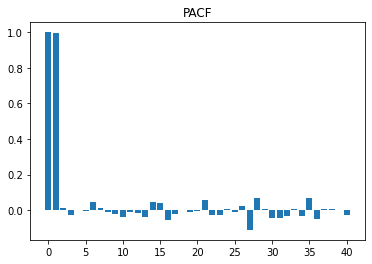

In [2]:
# Plot PACF
from statsmodels.tsa.stattools import acf, pacf
plt.bar(x=np.arange(0,41), height=pacf(df.Close))
plt.title("PACF")

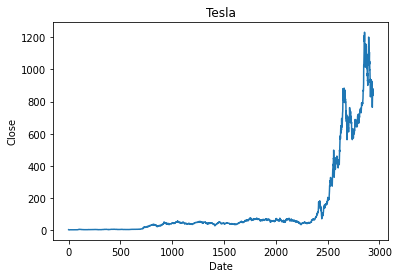

In [3]:
close = df["Close"]
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel("Close")
plt.show()

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
1,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
3,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
4,2010-07-08,3.228000,3.504000,3.114000,3.492000,3.492000,38557000
...,...,...,...,...,...,...,...
2935,2022-02-28,815.010010,876.859985,814.710022,870.429993,870.429993,33002300
2936,2022-03-01,869.679993,889.880005,853.780029,864.369995,864.369995,24922300
2937,2022-03-02,872.130005,886.479980,844.270020,879.890015,879.890015,24881100
2938,2022-03-03,878.770020,886.440002,832.599976,839.289978,839.289978,20373300


In [5]:
from fbprophet import Prophet

In [6]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)


In [7]:
df = df[["Date", "Close"]]

In [8]:
df = df.rename(columns={"Date" : "ds", "Close" : "y" })

In [9]:
model = Prophet()
model.fit(df)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
3300,2023-02-28,1456.993768,1388.150535,1528.329850
3301,2023-03-01,1457.694399,1390.949162,1526.620450
3302,2023-03-02,1457.630433,1387.204967,1524.335845
3303,2023-03-03,1457.686789,1389.567131,1519.320714
3304,2023-03-04,1461.571485,1392.627470,1532.539579


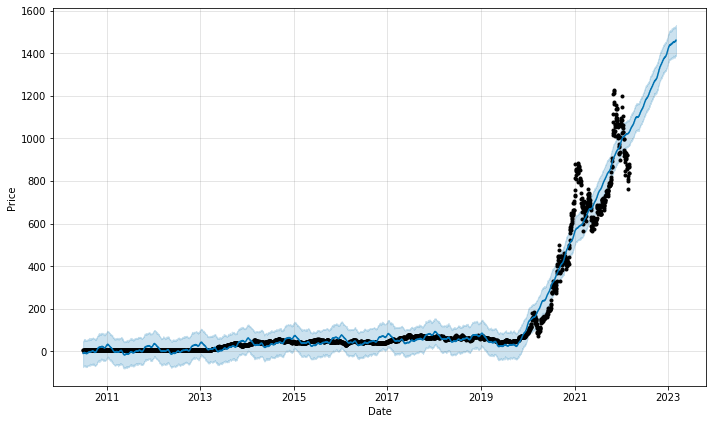

In [10]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

In [11]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [12]:

# create a new data frame with only 'Close column'
data = df.filter(['y'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

2352

In [13]:
dataset.shape

(2940, 1)

In [14]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[1.00427957e-03],
       [5.54310154e-04],
       [5.05400434e-05],
       ...,
       [7.14676984e-01],
       [6.81581377e-01],
       [6.80766215e-01]])

In [15]:
#create the training dataset
#create the scaled training dataset

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.00427957e-03, 5.54310154e-04, 5.05400434e-05, 0.00000000e+00,
       2.70633781e-04, 2.60851837e-04, 2.03790498e-04, 3.81495812e-04,
       6.58650889e-04, 6.66802509e-04, 7.89076807e-04, 9.96127953e-04,
       7.33645792e-04, 7.20603200e-04, 8.47768470e-04, 8.95047866e-04,
       8.39616851e-04, 7.74403891e-04, 8.02119399e-04, 7.41797412e-04,
       6.74954128e-04, 8.34725879e-04, 1.00264925e-03, 8.90156894e-04,
       7.58100651e-04, 6.17892789e-04, 6.19523113e-04, 5.26594646e-04,
       3.42368036e-04, 2.93458317e-04, 4.10841643e-04, 4.85836547e-04,
       5.46158534e-04, 4.84206223e-04, 4.87466871e-04, 5.38006914e-04,
       7.05930284e-04, 5.54310154e-04, 6.68432833e-04, 6.43977973e-04,
       6.35826353e-04, 6.63541861e-04, 5.99959225e-04, 7.58100651e-04,
       8.57550414e-04, 8.55920090e-04, 7.72773567e-04, 8.31465231e-04,
       8.00489075e-04, 7.12451580e-04, 8.02119399e-04, 8.67332358e-04,
       1.00754022e-03, 8.37986527e-04, 7.22233524e-04, 8.57550414e-04,
     

In [16]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [17]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2292, 60, 1)

In [18]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [19]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
2292/2292 [==============================] - 73s 29ms/step - loss: 2.1366e-05
Epoch 2/10
2292/2292 [==============================] - 69s 30ms/step - loss: 1.0868e-05
Epoch 3/10
2292/2292 [==============================] - 66s 29ms/step - loss: 6.2165e-06
Epoch 4/10
2292/2292 [==============================] - 65s 28ms/step - loss: 5.8641e-06
Epoch 5/10
2292/2292 [==============================] - 63s 28ms/step - loss: 4.6878e-06
Epoch 6/10
2292/2292 [==============================] - 64s 28ms/step - loss: 3.7918e-06
Epoch 7/10
2292/2292 [==============================] - 65s 28ms/step - loss: 3.7876e-06
Epoch 8/10
2292/2292 [==============================] - 64s 28ms/step - loss: 3.5629e-06
Epoch 9/10
2292/2292 [==============================] - 64s 28ms/step - loss: 3.2202e-06
Epoch 10/10
2292/2292 [==============================] - 63s 27ms/step - loss: 3.3508e-06


In [21]:
#create the testing data sets
#create a new array containing scale values from index 1543 to 2003
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [22]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [23]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(588, 60, 1)

In [24]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [25]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

112.30109972837154

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


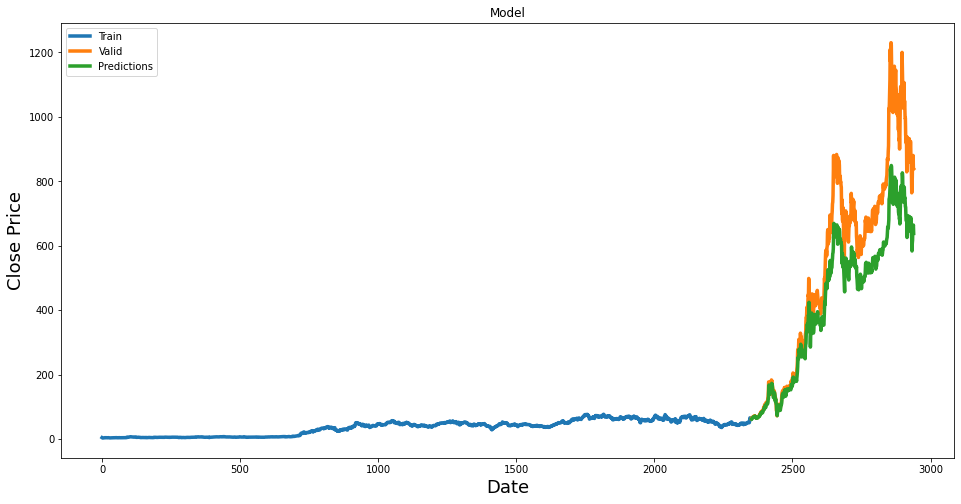

In [26]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['y'],linewidth=3.5)
plt.plot(valid[['y','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper_center')

In [27]:
import requests

requests?

In [28]:
response=requests.get(
    "https://api.twitter.com/1.1/search/tweets.json?q=tesla&tweet_mode=extended",
    headers={
        'authorization': 'Bearer '+"AAAAAAAAAAAAAAAAAAAAADz5ZwEAAAAAwCGA03KCY%2BraWSPlpOsr3skeGiE%3DMtvlkZSDWx8gm3S3OdI4tUoPoDlKW0xjdGx5XMt3Ep1DCcmVqr"
})

In [29]:
response.json()

{'search_metadata': {'completed_in': 0.068,
  'count': 15,
  'max_id': 1505318460162727939,
  'max_id_str': '1505318460162727939',
  'next_results': '?max_id=1505318357280698375&q=tesla&include_entities=1',
  'query': 'tesla',
  'refresh_url': '?since_id=1505318460162727939&q=tesla&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Sat Mar 19 23:01:03 +0000 2022',
   'display_text_range': [9, 95],
   'entities': {'hashtags': [],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 109651819,
      'id_str': '109651819',
      'indices': [0, 8],
      'name': 'Foro_TV',
      'screen_name': 'Foro_TV'}]},
   'favorite_count': 0,
   'favorited': False,
   'full_text': '@Foro_TV Maximum Overdrive. Imagínense cuando eso pase con un tesla pero porque la IA lo decida',
   'geo': None,
   'id': 1505318460162727939,
   'id_str': '1505318460162727939',
   'in_reply_to_screen_name': 'Foro_TV',
   

In [30]:
def get_data(tweet):
    data = {
        'id': tweet['id_str'],
        'created_at': tweet['created_at'],
        'text': tweet['full_text']
    }
    return data

In [31]:
df = pd.DataFrame()
for tweet in response.json()['statuses']:
    row = get_data(tweet)
    df = df.append(row, ignore_index=True)

In [32]:
df.head()

,id,created_at,text
0,1505318460162727939,Sat Mar 19 23:01:03 +0000 2022,@Foro_TV Maximum Overdrive. Imagínense cuando ...
1,1505318444559835138,Sat Mar 19 23:00:59 +0000 2022,@ChargerBall1976 @SoCalFan59 @ChaseDaniel Haha...
2,1505318440667688962,Sat Mar 19 23:00:58 +0000 2022,@JEDI_Rose8 @Tesla @elonmusk @WholeMarsBlog @s...
3,1505318439392473088,Sat Mar 19 23:00:58 +0000 2022,@Imposter_Edits @Tesla acid and @Tesla owners ...
4,1505318431406448640,Sat Mar 19 23:00:56 +0000 2022,"Obviously, this would negatively affect Tesla,..."


In [33]:
pip install flair

In [34]:

import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


2022-03-19 23:01:10,740 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [35]:
sentence = flair.data.Sentence()
sentiment_model.predict(sentence)

Sentence: ""   [− Tokens: 0]

In [36]:
response

<Response [200]>

In [37]:
from datetime import datetime, timedelta
import requests
import pandas as pd
response=requests.get(
    "https://api.twitter.com/1.1/search/tweets.json?q=tesla&tweet_mode=extended",
    headers={
        'authorization': 'Bearer '+"AAAAAAAAAAAAAAAAAAAAAEDEZwEAAAAAdXhlF13Gtzjox2IPE7jQ%2B8wTel0%3DtYUOMjc87UXiVmGJBBiyUblVTUWa5EgYRJGY9cRmhC3xfmtVcx"
})


# we use this function to subtract 60 mins from our datetime string
def time_travel(now, mins):
    now = datetime.strptime(now, dtformat)
    back_in_time = now - timedelta(minutes=mins)
    return back_in_time.strftime(dtformat)
    
now = datetime.now()  # get the current datetime, this is our starting point
last_week = now - timedelta(days=7)  # datetime one week ago = the finish line
now = now.strftime(dtformat)  # convert now datetime to format for API

df = pd.DataFrame()  # initialize dataframe to store tweets

df = pd.DataFrame()  # initialize dataframe to store tweets
while True:
    if datetime.strptime(now, dtformat) < last_week:
        # if we have reached 7 days ago, break the loop
        break
    pre60 = time_travel(now, 60)  # get 60 minutes before 'now'
    # assign from and to datetime parameters for the API
    params['start_time'] = pre60
    params['end_time'] = now
    response = requests.get(endpoint,
                            params=params,
                            headers=headers)  # send the request
    now = pre60  # move the window 60 minutes earlier
    # iteratively append our tweet data to our dataframe
    for tweet in response.json()['data']:
        row = get_data(tweet)  # we defined this function earlier
        df = df.append(row, ignore_index=True)

NameError: ignored